# 210409 Fix Component 14

In [1]:
const COMPONENT = 14;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18394963772901370188\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4140027139645965246\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18394963772901370188\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,651,57975,Burkholderia thailandensis,species,329,1,NaN,1,21,1,0.824881,2,0,thailandensis
2,1400,28450,Burkholderia pseudomallei,species,329,1,NaN,1,369,2,0.374681,1,1,pseudomallei
3,1599,13373,Burkholderia mallei,species,329,1,NaN,1,46,3,0.191064,0,2,mallei


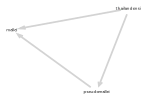

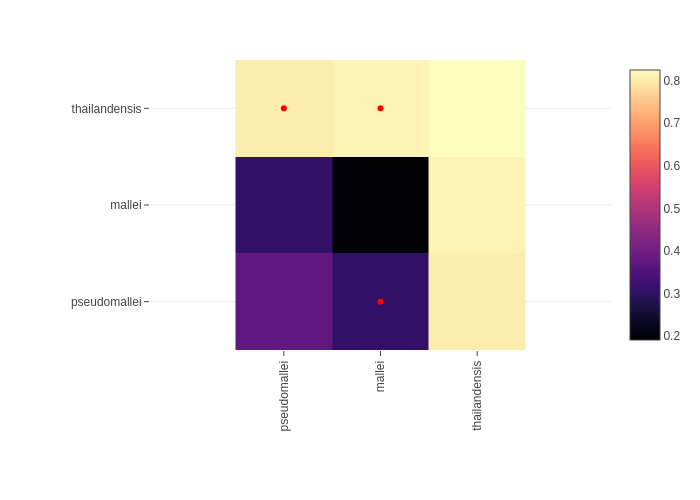

In [2]:
include("fix-component-base.jl");

In [3]:
trees = Dict{String, Any}();

## Edits

### thailandensis

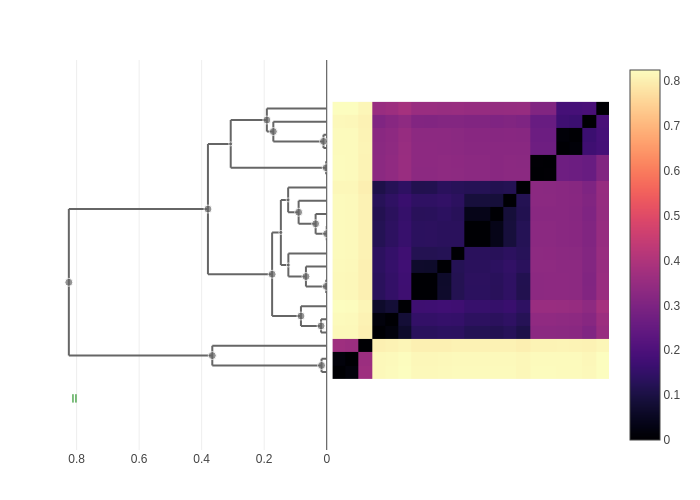

In [4]:
let taxon = "thailandensis"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [5]:
remove_subtrees!(edits, trees["thailandensis"], 39)

#1 thailandensis:
	3/21 removed
	Diameter 0.8249 => 0.3800


### mallei/pseudomallei

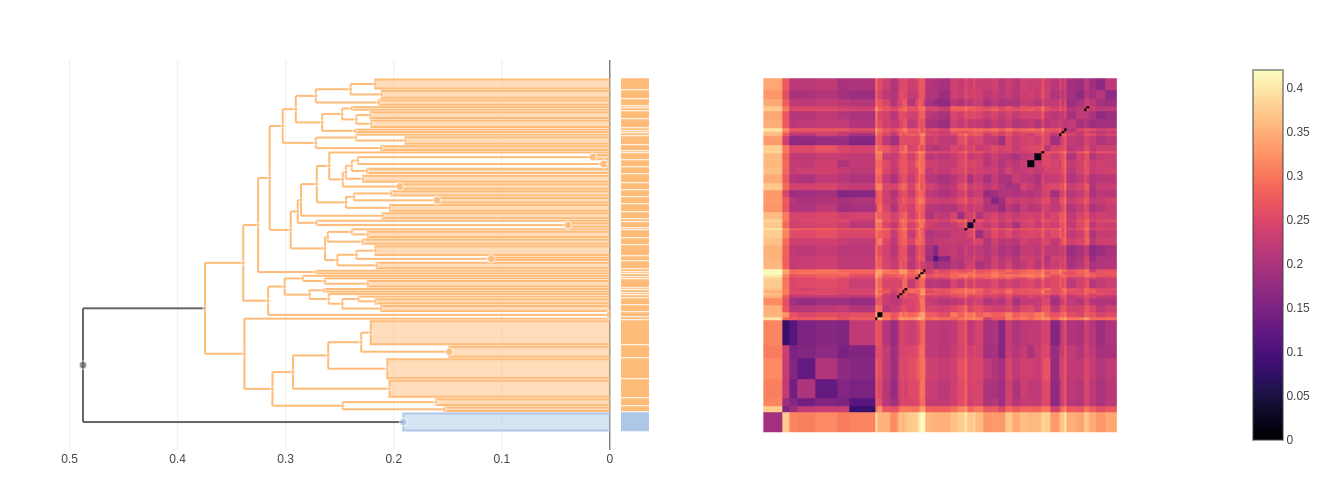

In [6]:
plot(multi_clustermap(cdata, ["mallei", "pseudomallei"]))

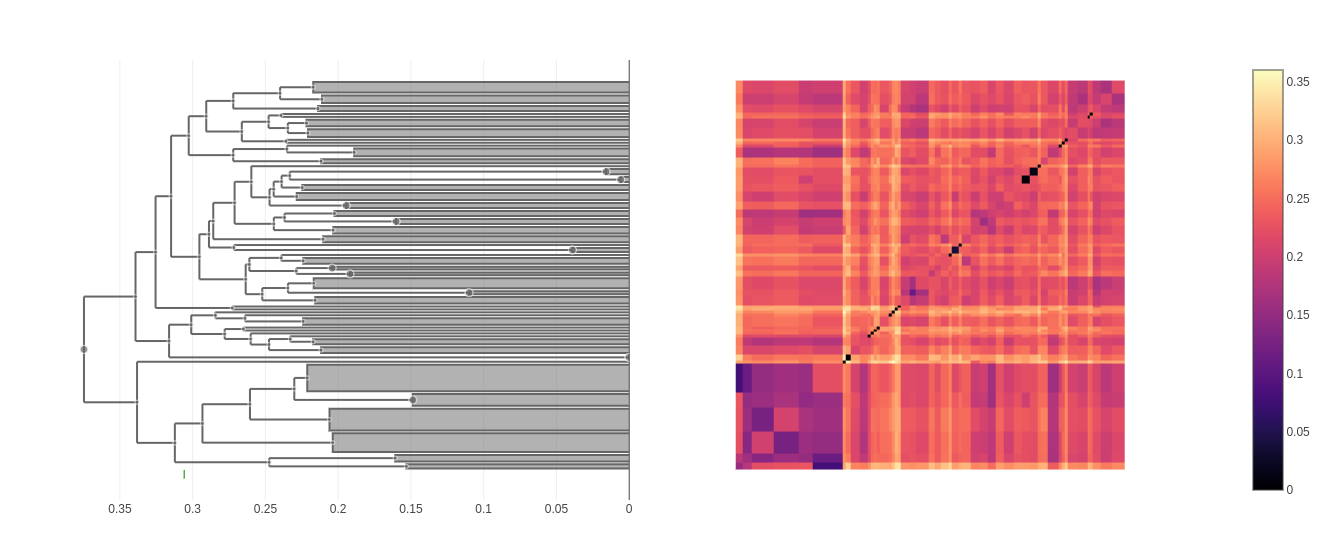

In [7]:
let taxon = "pseudomallei"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [8]:
set_threshold!(edits, "pseudomallei", .28)

0.28

## Finish

In [9]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Float64?,String
1,1,thailandensis,21,0.824881,0,3,,missing,0.3800
2,2,pseudomallei,369,0.374681,0,0,,0.28,0.3747
